In [10]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [11]:
digits = load_digits()

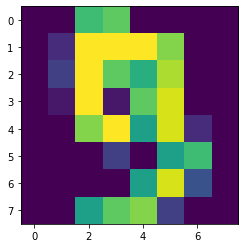

In [12]:
plt.imshow(digits.images[9])

In [13]:
X = digits.data
y = digits.target

In [14]:
print(X.shape, y.shape)

(1797, 64) (1797,)


In [15]:
from sklearn.model_selection import GridSearchCV

In [24]:
model_params = {
    'SVM' : {
        'model' : SVC(gamma='auto'),
        'params' : {
            'C' : [1,10,20],
            'kernel' : ['rbf','linear']
        }
    },
    'Random_Forest': {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1,5,10]
        }
    },
    'Logistic_Regression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
        'params' : {
            'C' : [1,5,10]
        }
    },
    'Gaussian_NB' : {
        'model' : GaussianNB(),
        'params' : {}
    },
    'Multinomial_NB' : {
        'model' : MultinomialNB(),
        'params' : {}
    },
    'Decision_Tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini','entropy']
        }
    }
}

In [25]:
score = []
for model_name, parameters in model_params.items():
    clf = GridSearchCV(parameters['model'],parameters['params'],cv=5,return_train_score=False)
    clf.fit(X, y)
    score.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

In [26]:
import pandas as pd 
df = pd.DataFrame(score,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,SVM,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,Random_Forest,0.893179,{'n_estimators': 10}
2,Logistic_Regression,0.922114,{'C': 1}
3,Gaussian_NB,0.806928,{}
4,Multinomial_NB,0.870350,{}
5,Decision_Tree,0.804701,{'criterion': 'entropy'}
